# **Data-Driven Problem Solving**

# By: Aaryan Mahipal and Amelia Roopnarine

Task: Exploratory Data Analysis

# **Problem Statement**

The stock market is a complex and dynamic system influenced by a variety of factors, including economic indicators, market sentiment, and industry-specific developments. Nvidia, a leading player in the semiconductor and AI industries, has shown significant stock price volatility driven by its pivotal role in the AI revolution and its innovative product portfolio. Predicting Nvidia's stock price is a challenging yet valuable endeavor, as it requires integrating traditional financial modeling with advanced techniques like sentiment analysis to capture market sentiment reflected in news, social media, and other public sources.

The goal of this project is to develop a predictive model for Nvidia's stock price using historical market data and sentiment analysis. By analyzing how sentiment—derived from financial news and online discourse—correlates with Nvidia's stock performance, this model seeks to provide actionable insights for investors and financial analysts.



# **Background**

Stock market prediction has long been an area of interest due to its potential to unlock profitable trading strategies. Traditional methods rely heavily on technical indicators and fundamental analysis. However, with the rise of AI and big data, sentiment analysis has emerged as a powerful tool to gauge the market’s psychological state. Nvidia, as a dominant force in AI and gaming GPUs, represents a highly relevant case study for stock price prediction given its sensitivity to market sentiment and industry trends.

# Part 1: Importing the Data

Nvidia Stock Price Data from 2015 to 2024

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
url = 'raw/nvidia_stock_2015_to_2024.csv'
df = pd.read_csv(url)
df

,Unnamed: 0,date,open,high,low,close,adjclose,volume
0,0,2015-01-02,0.503250,0.507000,0.495250,0.503250,0.483218,113680000
1,1,2015-01-05,0.503250,0.504750,0.492500,0.494750,0.475056,197952000
2,2,2015-01-06,0.495500,0.496000,0.479250,0.479750,0.460654,197764000
3,3,2015-01-07,0.483250,0.487500,0.477000,0.478500,0.459453,321808000
4,4,2015-01-08,0.484000,0.499500,0.483750,0.496500,0.476737,283780000
...,...,...,...,...,...,...,...,...
2364,2364,2024-05-24,104.448997,106.474998,103.000000,106.469002,106.460258,429494000
2365,2365,2024-05-28,110.244003,114.939003,109.883003,113.901001,113.891647,652728000
2366,2366,2024-05-29,113.050003,115.491997,110.901001,114.824997,114.815567,557442000
2367,2367,2024-05-30,114.650002,115.819000,109.663002,110.500000,110.490921,487350000


# Part 2: Cleaning the Data

In [ ]:
import os

# Checking for Null Values
if df.isnull().sum().sum() == 0:
  print("Dataset doesn't contain any null values!")

# Create a copy of the DataFrame to avoid modifying the original
df_cleaned = df.copy()

df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
# Drop the unnecessary column
df_cleaned = df_cleaned.drop('Unnamed: 0', axis=1)
df_cleaned

# Save Cleaned Data
# Define the folder and file path
folder_path = 'processed'
file_name = 'nvidia_stock_cleaned.csv'

# Save the cleaned DataFrame to the folder
file_path = os.path.join(folder_path, file_name)
df_cleaned.to_csv(file_path, index=False)

print(f"Cleaned DataFrame saved to {file_path}")


Dataset doesn't contain any null values!
Cleaned DataFrame saved to processed/nvidia_stock_cleaned.csv


In [ ]:
df_cleaned.dtypes

,0
date,datetime64[ns]
open,float64
high,float64
low,float64
close,float64
adjclose,float64
volume,int64


# Part 3: Data Visualization and Exploratory Data Analysis

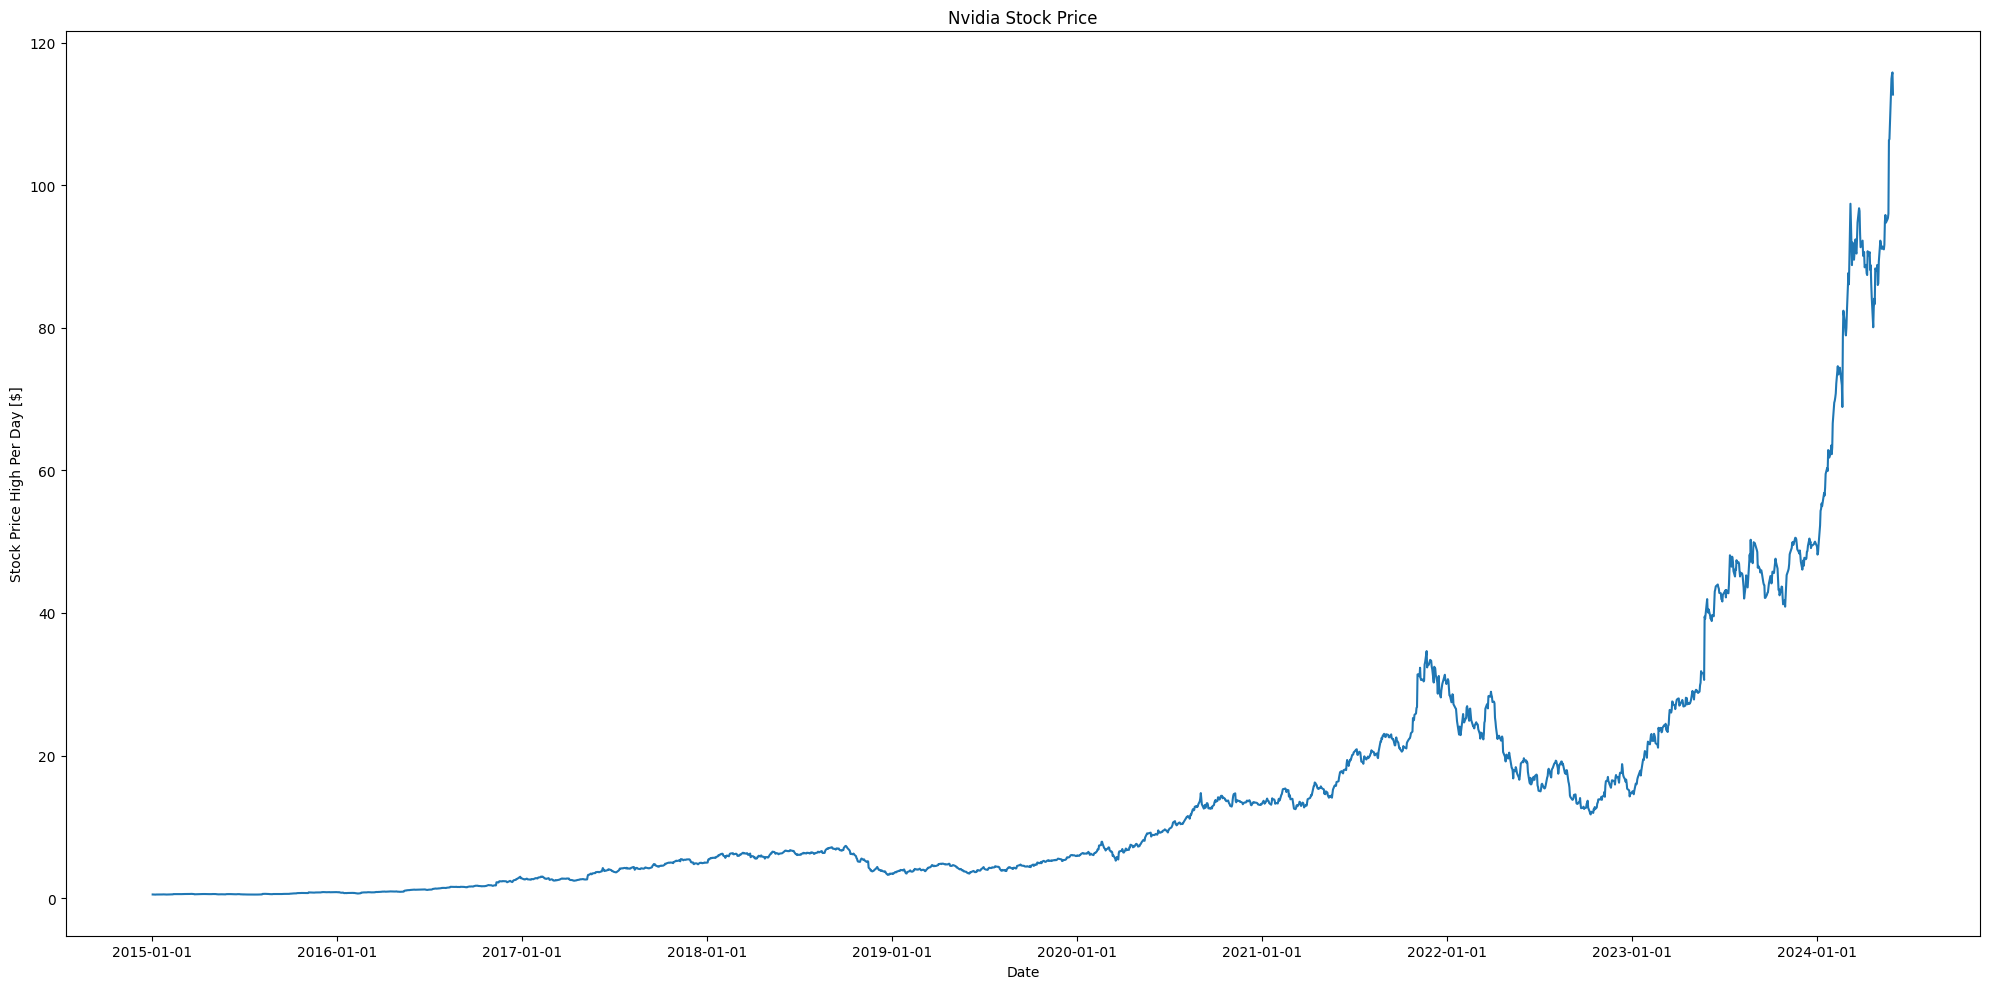

In [ ]:
# Plotting the data
from datetime import datetime
from matplotlib import pyplot as plt, dates as mdates

plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True
plt.xlabel('Date')
plt.ylabel('Stock Price High Per Day [$]')
plt.title('Nvidia Stock Price')


dates = df_cleaned['date']  # Use the cleaned DataFrame

x = dates
y = df_cleaned['high']  # Use the cleaned DataFrame

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.plot(x, y)

plt.show()

# **Approach**

Statistical Summary of Data

1.   **Statistical Summary of Data**

*   Calculate basic statistics (mean, median, standard deviation, etc.).
*   Check data ranges and skewness for critical parameters (open, close, high, low, volume).


2.   **Trend Analysis**


*   Explore the long-term trends of stock prices using rolling averages.
*   Identify patterns like seasonality, volatility, and outliers.



3.   **Correlation Analysis**


*   Explore relationships between stock price metrics (e.g., high, low, volume) to identify dependencies.
*   Use Pearson correlation matrix and visual heatmaps.


4.   **Volatility Analysis**



*   Measure volatility using daily returns.

*   Plot volatility using a moving standard deviation.



5.   **Sentiment Analysis**

*   Merge price data with external sentiment datasets if available.

*   Analyze potential correlations between sentiment data and stock prices.










In [ ]:
import seaborn as sns
import numpy as np

df_cleaned.head(), df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2369 non-null   datetime64[ns]
 1   open      2369 non-null   float64       
 2   high      2369 non-null   float64       
 3   low       2369 non-null   float64       
 4   close     2369 non-null   float64       
 5   adjclose  2369 non-null   float64       
 6   volume    2369 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 129.7 KB


(        date     open     high      low    close  adjclose     volume
 0 2015-01-02  0.50325  0.50700  0.49525  0.50325  0.483218  113680000
 1 2015-01-05  0.50325  0.50475  0.49250  0.49475  0.475056  197952000
 2 2015-01-06  0.49550  0.49600  0.47925  0.47975  0.460654  197764000
 3 2015-01-07  0.48325  0.48750  0.47700  0.47850  0.459453  321808000
 4 2015-01-08  0.48400  0.49950  0.48375  0.49650  0.476737  283780000,
 None)

In [ ]:
# Basic Statistical Summary
stats_summary = df_cleaned.describe()
stats_summary

,date,open,high,low,close,adjclose,volume
count,2369,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2.369000e+03
mean,2019-09-16 01:22:03.596454144,14.188477,14.445906,13.919531,14.197878,14.169242,4.787526e+08
min,2015-01-02 00:00:00,0.481250,0.487500,0.473500,0.478500,0.459453,5.244800e+07
25%,2017-05-10 00:00:00,2.998250,3.045500,2.947500,3.032250,2.992067,3.188000e+08
50%,2019-09-17 00:00:00,6.191500,6.262750,6.091500,6.178250,6.129900,4.277960e+08
75%,2022-01-21 00:00:00,17.915001,18.243999,17.634001,17.983999,17.963766,5.745880e+08
max,2024-05-31 00:00:00,114.650002,115.819000,110.901001,114.824997,114.815567,3.692928e+09
std,NaN,18.683473,19.020099,18.315670,18.691694,18.697431,2.559874e+08


# **Key Insights**

1. Stock Prices:
Significant growth in Nvidia's stock price over the years:
- Minimum price (high): ~$0.48

- Maximum price (high): ~$115.82

- Mean stock price (high): ~$14.45, showing a wide range of price movement.

2. Volume:
Volume has a very high standard deviation, indicating fluctuating trading activity.

- Max trading volume peaked at ~3.69 billion.


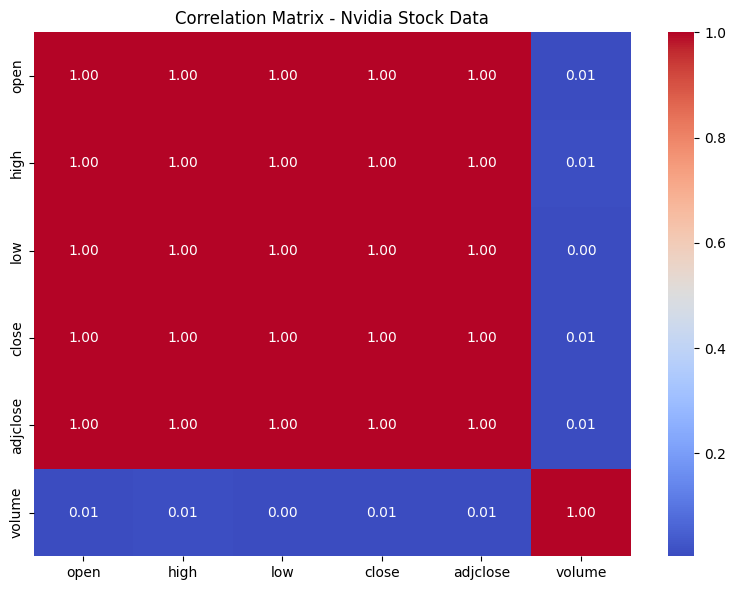

In [ ]:
# Correlation Matrix
correlation_matrix = df_cleaned.drop(columns=['date']).corr()

# Plotting correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - Nvidia Stock Data")
plt.show()

# **Key Insights**

1. Correlations:
- high, low, open, close, and adjclose are highly correlated (> 0.99).

- Volume has minimal correlation with price columns.



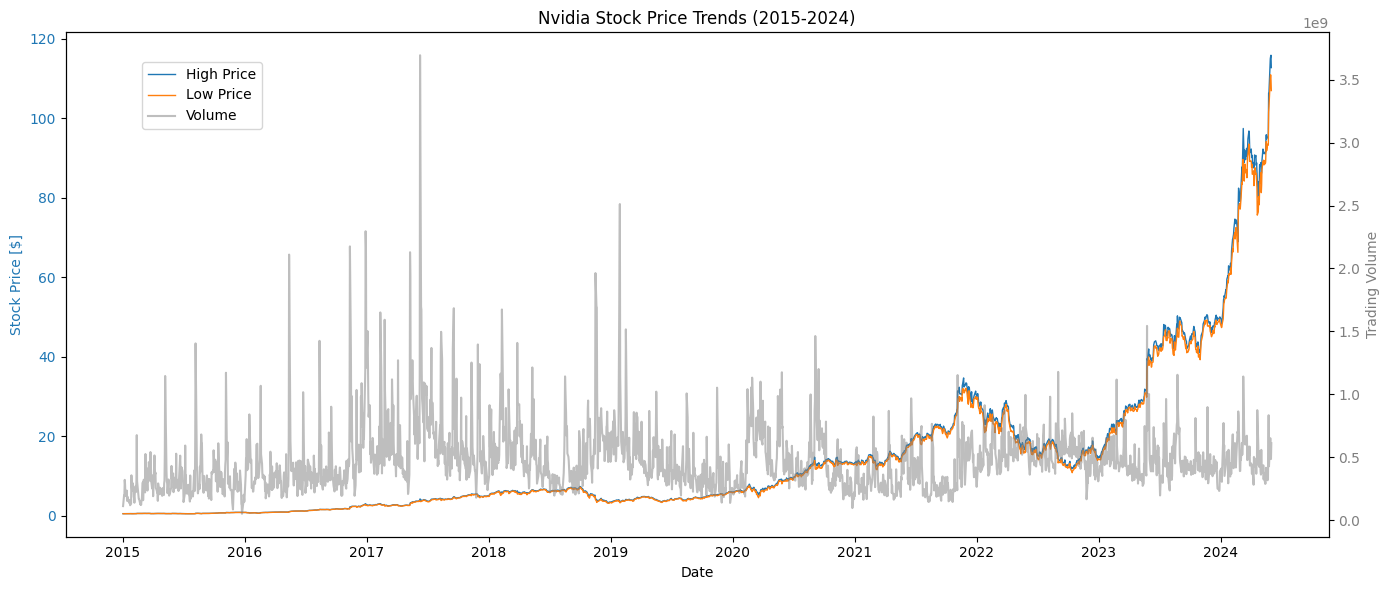

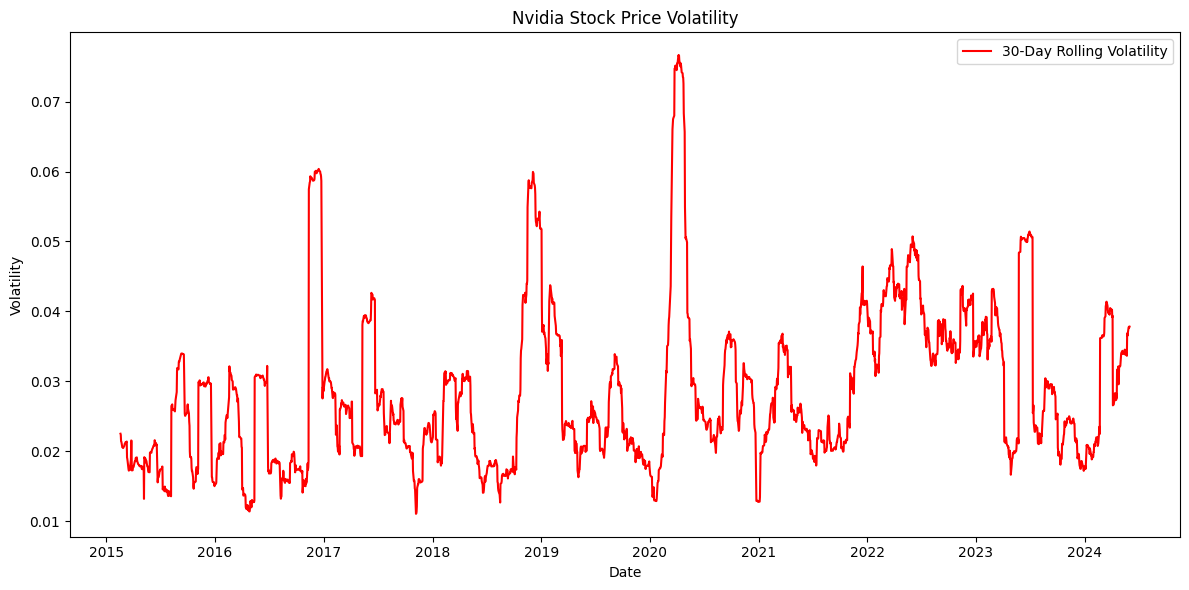

In [ ]:
# Visualize Trends for Stock Prices and Volume
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot stock prices
ax1.plot(df_cleaned['date'], df_cleaned['high'], label='High Price', color='tab:blue', linewidth=1)
ax1.plot(df_cleaned['date'], df_cleaned['low'], label='Low Price', color='tab:orange', linewidth=1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price [$]', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.title("Nvidia Stock Price Trends (2015-2024)")

# Add volume on secondary axis
ax2 = ax1.twinx()
ax2.plot(df_cleaned['date'], df_cleaned['volume'], label='Volume', color='tab:gray', alpha=0.5)
ax2.set_ylabel('Trading Volume', color='tab:gray')
ax2.tick_params(axis='y', labelcolor='tab:gray')

fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()

# Calculate Daily Returns for Volatility
df_cleaned['daily_return'] = df_cleaned['close'].pct_change()

# Plot Rolling Volatility
df_cleaned['volatility'] = df_cleaned['daily_return'].rolling(window=30).std()
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['date'], df_cleaned['volatility'], label='30-Day Rolling Volatility', color='red')
plt.title("Nvidia Stock Price Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


# **Key Takeaways**:
1. Stock Price Trend:

Nvidia's stock price has experienced exponential growth starting around 2020, likely due to AI advancements and increasing demand for GPUs.
Price volatility is also visually evident, with sharp price changes in certain periods.

2. Trading Volume:

Trading volume spikes align with periods of significant stock price movement, suggesting volume-price relationships.

3. Volatility Trends:

The 30-day rolling volatility shows notable peaks, especially during periods of sharp price movements. These periods can be further analyzed for external factors like earnings releases, industry developments, or macroeconomic events.



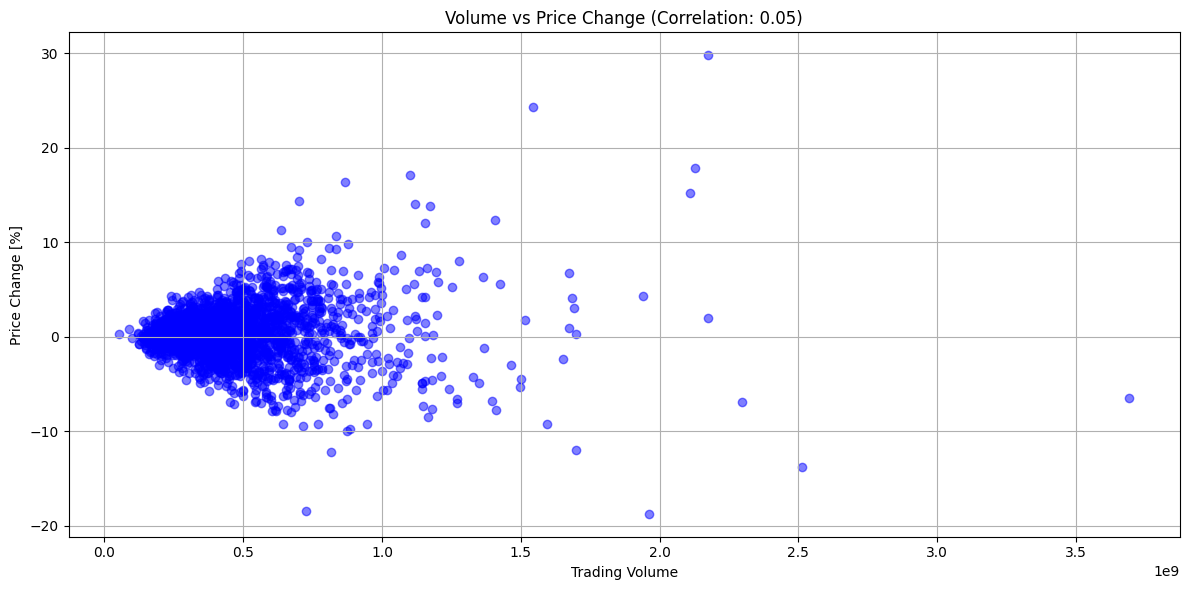

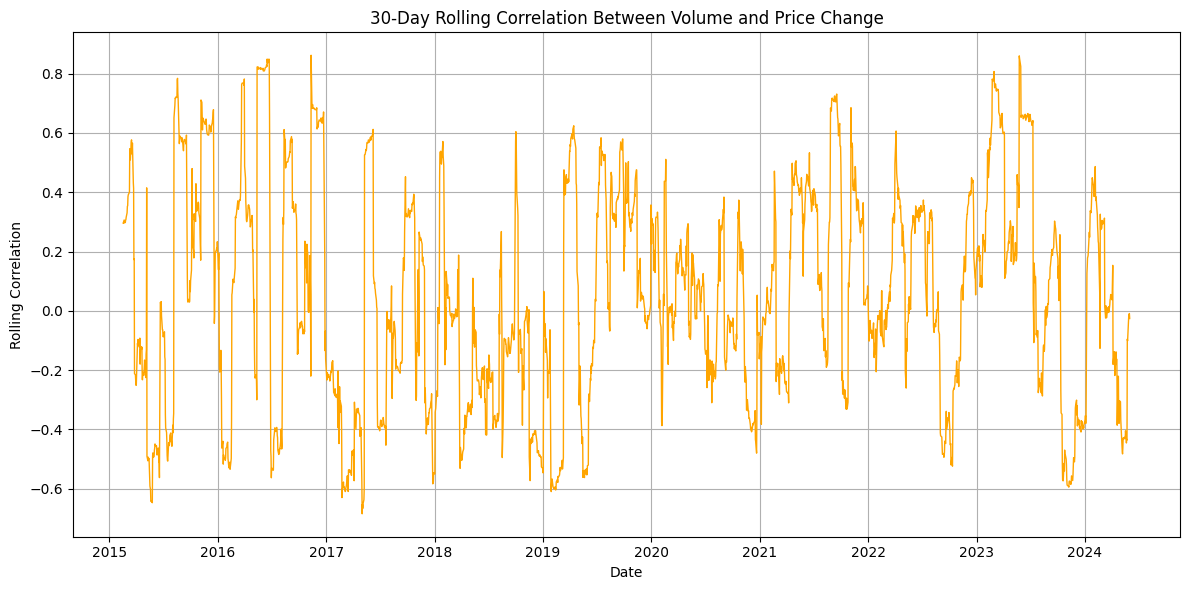

(count    2368.000000
 mean        0.273495
 std         3.047355
 min       -18.755865
 25%        -1.204783
 50%         0.263352
 75%         1.736518
 max        29.806699
 Name: price_change, dtype: float64,
 0.047389720141520104)

In [ ]:
# Analyze Volume vs Price Movements

# Calculate Price Change as percentage change from previous close
df_cleaned['price_change'] = df_cleaned['close'].pct_change() * 100

# Correlation between Volume and Price Change
volume_price_corr = df_cleaned['volume'].corr(df_cleaned['price_change'])

# Plot Scatter Plot for Volume vs Price Change
plt.figure(figsize=(12, 6))
plt.scatter(df_cleaned['volume'], df_cleaned['price_change'], alpha=0.5, color='blue')
plt.title(f"Volume vs Price Change (Correlation: {volume_price_corr:.2f})")
plt.xlabel("Trading Volume")
plt.ylabel("Price Change [%]")
plt.grid(True)
plt.show()

# Rolling Correlation Between Volume and Price Change
df_cleaned['volume_price_corr'] = df_cleaned['volume'].rolling(window=30).corr(df_cleaned['price_change'])

# Plot Rolling Correlation
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['date'], df_cleaned['volume_price_corr'], color='orange', linewidth=1)
plt.title("30-Day Rolling Correlation Between Volume and Price Change")
plt.xlabel("Date")
plt.ylabel("Rolling Correlation")
plt.grid(True)
plt.show()

# Summary of Price Change Stats
price_change_summary = df_cleaned['price_change'].describe()

price_change_summary, volume_price_corr


# **Key Insights:**

1. Correlation Between Volume and Price Change:

The correlation coefficient is **0.047**, indicating a very weak positive correlation. This suggests that trading volume has minimal influence on short-term price changes.

2. Price Change Statistics:

Average daily price change is **0.27%** with significant variability (std = 3.05%).

Maximum price increase: **29.8%**; maximum drop: **-18.76%**.

3. Rolling Correlation:

The 30-day rolling correlation plot shows fluctuations, but the relationship remains **weak across time**.


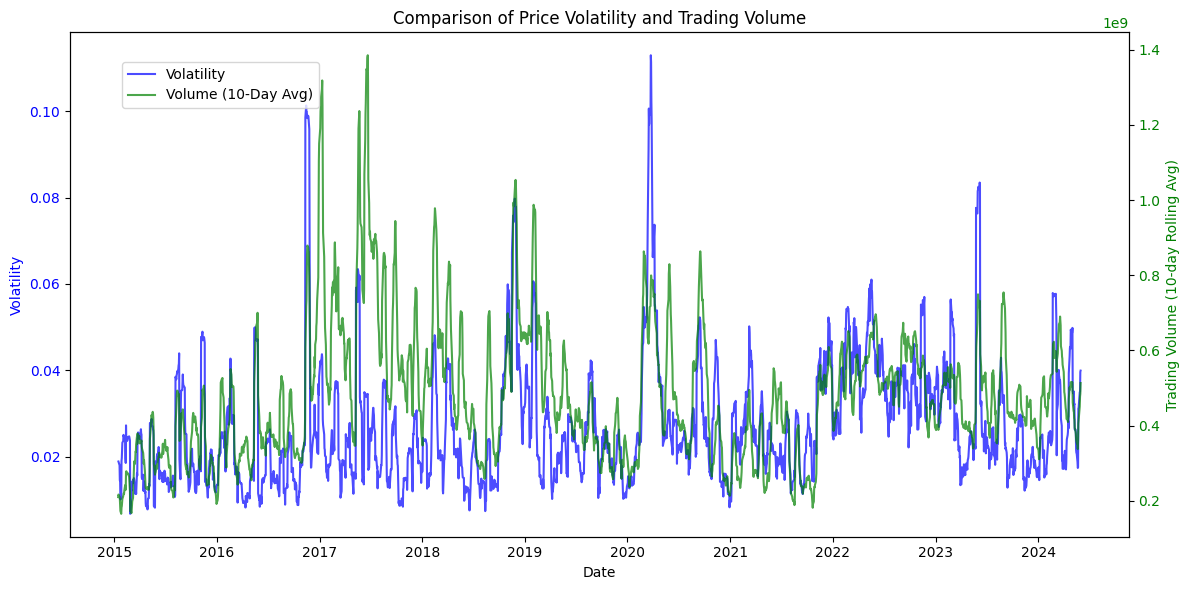

Correlation Between Volatility and Volume (10-Day Rolling): 0.55


In [ ]:
# Calculate Daily Returns and Volatility
df_cleaned['daily_return'] = df_cleaned['close'].pct_change()
df_cleaned['volatility'] = df_cleaned['daily_return'].rolling(window=10).std()

# Rolling Average for Volume (10-day window)
df_cleaned['volume_rolling'] = df_cleaned['volume'].rolling(window=10).mean()

# Drop NaN values created by rolling calculations
stock_data = df_cleaned.dropna()

# Plot Volatility and Volume
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Volatility on Primary Axis
ax1.set_xlabel("Date")
ax1.set_ylabel("Volatility", color="blue")
ax1.plot(df_cleaned['date'], df_cleaned['volatility'], label="Volatility", color="blue", alpha=0.7)
ax1.tick_params(axis='y', labelcolor="blue")

# Plot Volume on Secondary Axis
ax2 = ax1.twinx()
ax2.set_ylabel("Trading Volume (10-day Rolling Avg)", color="green")
ax2.plot(df_cleaned['date'], df_cleaned['volume_rolling'], label="Volume (10-Day Avg)", color="green", alpha=0.7)
ax2.tick_params(axis='y', labelcolor="green")

# Title and Legend
plt.title("Comparison of Price Volatility and Trading Volume")
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()

# Correlation Analysis
volatility_volume_corr = df_cleaned['volatility'].corr(df_cleaned['volume_rolling'])
print(f"Correlation Between Volatility and Volume (10-Day Rolling): {volatility_volume_corr:.2f}")

# **Key Takeaways:**

1. High Volume, High Volatility:

- Events with spikes in trading volume often coincide with sharp increases in price volatility. This suggests that Nvidia's stock is particularly sensitive to significant market-moving events like:

- Product launches

- Earnings calls

- Industry developments (e.g., advancements in AI)

2. Market Stability:

Periods with lower volume and volatility indicate market stability, where Nvidia's price movements are less extreme.

3. Recent Market Behavior:

The post-2023 rise in both metrics reflects renewed investor confidence and interest in Nvidia, likely due to its role in emerging technologies like AI, machine learning, and data center growth.


The stock news data has been obtained from - https://www.kaggle.com/datasets/eshanrizz/stocknews-meta?resource=download

In [ ]:
# Load the stock news data
url = 'raw/stocknews.csv'
df_news = pd.read_csv(url)
df_news

,date,news
0,2017-08-18,Mark Zuckerberg's philanthropic fund just hire...
1,2017-08-19,Travis Kalanick lasted in his role for 6.5 yea...
2,2017-08-21,A top Facebook analyst has a $21 billion quest...
3,2017-08-22,Ad giant WPP: 'Our industry may be in danger o...
4,2017-08-23,Mark Cuban is trying to fix social media's big...
...,...,...
2308,2024-06-18,Retire Rich: 3 Powerhouse Stocks to Buy for Lo...
2309,2024-06-19,Why Piper Sandler Is Pounding the Table on Adv...
2310,2024-06-20,S&P 500 Predictions 2024: 3 Recent Price Targe...
2311,2024-06-21,Growth Stocks Leave Value Stocks In The Dust: ...


#VADER Use and Applications

- One popular tool for sentiment analysis is **VADER (Valence Aware Dictionary and sEntiment Reasoner)**, a lexicon and rule-based sentiment analysis tool specifically designed for texts that contain informal language like social media posts and reviews.

- VADER works by analyzing the polarity of words and assigning a sentiment score to each word based on its emotional value. The tool then combines these scores into an overall sentiment score for the entire text, which consists of four components:

- **Positive (pos):** The proportion of the text that expresses a positive sentiment.

- **Negative (neg):** The proportion of the text that expresses a negative sentiment.

- **Neutral (neu):** The proportion of the text that is neutral or lacks clear sentiment.

- **Compound:** The aggregated sentiment score that ranges from -1 (extremely negative) to +1 (extremely positive).
Sentiment Scores

The compound score is the most important and is computed as a normalized value between **-1 (most negative)** and **+1 (most positive)**. It summarizes the sentiment of the text:

- **Compound score > 0.05:** Positive sentiment
- **Compound score < -0.05:** Negative sentiment
- **Compound score between -0.05 and 0.05:** Neutral sentiment
- **Implementation:** Sentiment Analysis using VADER

VADER provides an efficient method for sentiment analysis, particularly suitable for texts with **informal language**, such as tweets, reviews, and comments. By using the compound score, you can easily determine the overall sentiment of a sentence, while the individual positive, negative, and neutral scores give you a breakdown of the sentiment expressed.


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


News Data with Sentiment Scores:
           date                                               news  sentiment
0    2017-08-18  Mark Zuckerberg's philanthropic fund just hire...     0.0000
1    2017-08-19  Travis Kalanick lasted in his role for 6.5 yea...     0.0000
2    2017-08-21  A top Facebook analyst has a $21 billion quest...     0.2023
3    2017-08-22  Ad giant WPP: 'Our industry may be in danger o...    -0.3400
4    2017-08-23  Mark Cuban is trying to fix social media's big...     0.2960
...         ...                                                ...        ...
2308 2024-06-18  Retire Rich: 3 Powerhouse Stocks to Buy for Lo...     0.9823
2309 2024-06-19  Why Piper Sandler Is Pounding the Table on Adv...     0.9367
2310 2024-06-20  S&P 500 Predictions 2024: 3 Recent Price Targe...     0.9860
2311 2024-06-21  Growth Stocks Leave Value Stocks In The Dust: ...     0.5859
2312 2024-06-22  Invest in Promising AI Stocks Before the Disin...     0.4019

[2313 rows x 3 columns]


<ipython-input-13-c1da2dff93eb>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['sentiment'].fillna(0, inplace=True)


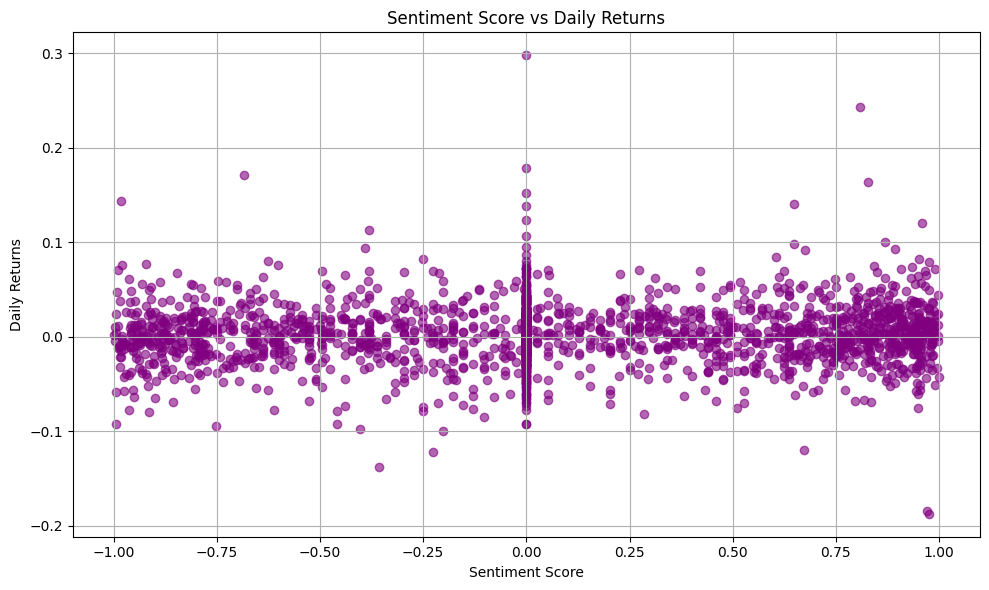

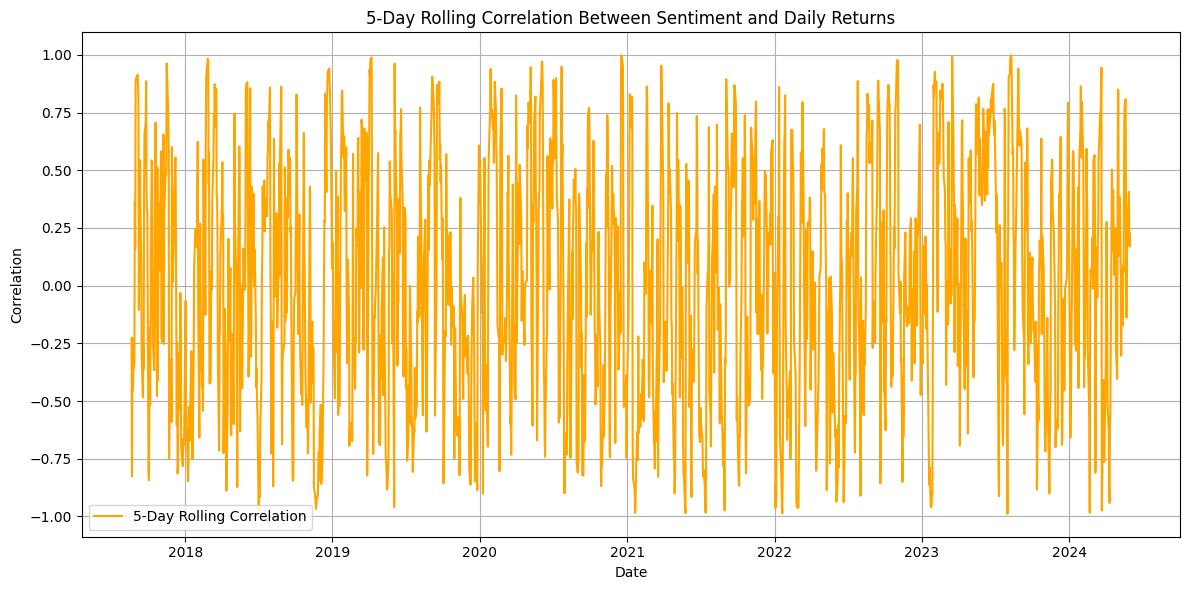

,sentiment,daily_return
sentiment,1.000000,0.044271
daily_return,0.044271,1.000000


In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Ensure dates are in datetime format
df_news['date'] = pd.to_datetime(df_news['date'])

# Apply VADER sentiment analysis
df_news['sentiment'] = df_news['news'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Print sentiment results
print("News Data with Sentiment Scores:")
print(df_news)

# Merge with Stock Data
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
merged_df = pd.merge(df_cleaned, df_news.groupby('date')['sentiment'].mean().reset_index(), on='date', how='left')

# Fill missing sentiment values with 0 (assume neutral sentiment for missing days)
merged_df['sentiment'].fillna(0, inplace=True)

# Calculate correlation
sentiment_correlation = merged_df[['sentiment', 'daily_return']].corr()

# Plot Sentiment vs Daily Returns
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['sentiment'], merged_df['daily_return'], alpha=0.6, color='purple')
plt.title("Sentiment Score vs Daily Returns")
plt.xlabel("Sentiment Score")
plt.ylabel("Daily Returns")
plt.grid(True)
plt.show()

# Display Rolling Correlation
merged_df['rolling_corr'] = merged_df['sentiment'].rolling(window=5).corr(merged_df['daily_return'])

plt.figure(figsize=(12, 6))
plt.plot(merged_df['date'], merged_df['rolling_corr'], label='5-Day Rolling Correlation', color='orange')
plt.title("5-Day Rolling Correlation Between Sentiment and Daily Returns")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.legend()
plt.grid(True)
plt.show()

sentiment_correlation

 # **Key Insights**

1. Sentiment Score vs Daily Returns (Scatter Plot)
Observation:

- There is **no strong linear relationship** between sentiment scores and daily returns.

- A few outliers exist at extreme sentiment scores (close to -1 or 1) and extreme returns.

- Sentiment has a **weak immediate impact** on daily returns.

- Outliers suggest that **extreme news** sentiment might influence significant price movements.

2. 5-Day Rolling Correlation Between Sentiment and Daily Returns

- The correlation between sentiment and daily returns **fluctuates significantly over time**.

- It **alternates** between positive and negative values, suggesting that the relationship is **not stable**.

- Certain periods (e.g., 2023) show relatively more consistent positive correlations.

From the above, we can conclude that sentiment's influence on stock-returns is **time-dependent**. Periods of sustained positive or negative correlation could align with significant market events, like earnings reports or macroeconomic news.




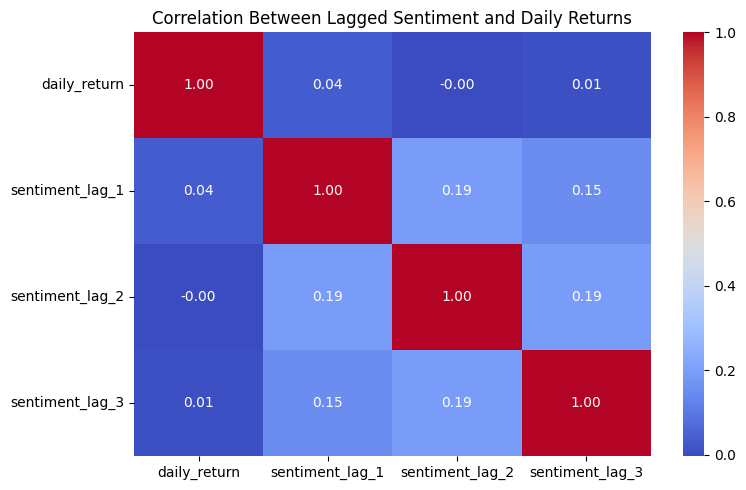

,daily_return,sentiment_lag_1,sentiment_lag_2,sentiment_lag_3
daily_return,1.000000,0.035949,-0.003057,0.008020
sentiment_lag_1,0.035949,1.000000,0.190915,0.151743
sentiment_lag_2,-0.003057,0.190915,1.000000,0.190209
sentiment_lag_3,0.008020,0.151743,0.190209,1.000000


In [ ]:
# Introduce Lagged Sentiment Scores (T+1, T+2, T+3)
for lag in range(1, 4):  # Lag of 1 to 3 days
    merged_df[f'sentiment_lag_{lag}'] = merged_df['sentiment'].shift(lag)

# Correlation Analysis Between Lagged Sentiment and Daily Returns
lagged_corr = merged_df[['daily_return'] + [f'sentiment_lag_{lag}' for lag in range(1, 4)]].corr()

# Plot Correlation Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(lagged_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Lagged Sentiment and Daily Returns")
plt.show()

# Print Correlation Results
lagged_corr

# Key Insights

1. Correlation Between Sentiment Lags and Daily Returns:

- sentiment_lag_1: 0.0359 (weak positive correlation).

- sentiment_lag_2: -0.0030 (no correlation).

- sentiment_lag_3: 0.0080 (very weak positive correlation).


The correlation between sentiment scores and daily returns remains **very weak** even when introducing lags of **1-3 days**. There is **no clear evidence** of delayed sentiment impact on stock price movements.

2. Sentiment Lag Inter-Correlations:

- sentiment_lag_1, sentiment_lag_2, and sentiment_lag_3 show **moderate correlations** with each other (ranging from 0.15 to 0.19). This suggests that sentiment scores tend to have some persistence (continuity) over multiple days.

From the above, we can conclude that sentiment scores, both immediate and lagged, have **minimal influence** on Nvidia’s daily returns. While sentiment shows continuity across days, it does not translate into a consistent relationship with stock price movements. Outliers or events with extreme sentiment might still have an impact, but further analysis (e.g., event studies) would be required to confirm this.


High Sentiment Event Dates:
671    2017-08-31
677    2017-09-11
690    2017-09-28
700    2017-10-12
711    2017-10-27
          ...    
2362   2024-05-22
2363   2024-05-23
2365   2024-05-28
2366   2024-05-29
2367   2024-05-30
Name: date, Length: 441, dtype: datetime64[ns]
Low Sentiment Event Dates:
679    2017-09-13
685    2017-09-21
687    2017-09-25
689    2017-09-27
694    2017-10-04
          ...    
2166   2023-08-11
2226   2023-11-06
2300   2024-02-23
2313   2024-03-13
2335   2024-04-15
Name: date, Length: 288, dtype: datetime64[ns]


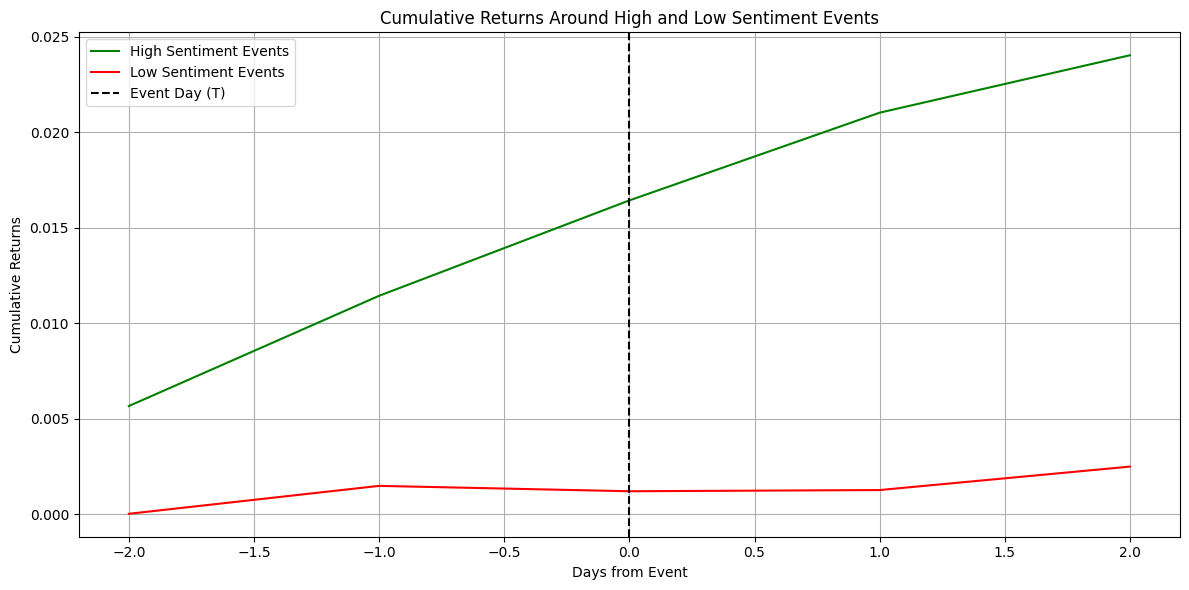

In [ ]:
# Define thresholds for extreme sentiment
positive_threshold = 0.7  # High positive sentiment
negative_threshold = -0.7  # High negative sentiment

# Identify high-sentiment events
high_sentiment_dates = merged_df[merged_df['sentiment'] >= positive_threshold]['date']
low_sentiment_dates = merged_df[merged_df['sentiment'] <= negative_threshold]['date']

print(f"High Sentiment Event Dates:\n{high_sentiment_dates}")
print(f"Low Sentiment Event Dates:\n{low_sentiment_dates}")


# Function to calculate returns around an event (with index check)
def event_returns(df, event_dates, window=2):
    event_analysis = []
    for date in event_dates:
        if date in df['date'].values:  # Ensure event date exists
            event_day = df[df['date'] == date].index[0]
            # Check window bounds
            start_index = max(0, event_day - window)
            end_index = min(len(df), event_day + window + 1)
            window_data = df.iloc[start_index:end_index][['date', 'daily_return']].copy()
            window_data['days_from_event'] = range(start_index - event_day, end_index - event_day)
            event_analysis.append(window_data)
    return pd.concat(event_analysis, ignore_index=True)

# Analyze returns around high and low sentiment events
high_sentiment_returns = event_returns(merged_df, high_sentiment_dates)
low_sentiment_returns = event_returns(merged_df, low_sentiment_dates)

# Plot cumulative returns
plt.figure(figsize=(12, 6))

# High Sentiment Events
high_cumulative = high_sentiment_returns.groupby('days_from_event')['daily_return'].mean().cumsum()
plt.plot(high_cumulative, label='High Sentiment Events', color='green')

# Low Sentiment Events
low_cumulative = low_sentiment_returns.groupby('days_from_event')['daily_return'].mean().cumsum()
plt.plot(low_cumulative, label='Low Sentiment Events', color='red')

plt.axvline(0, color='black', linestyle='--', label='Event Day (T)')
plt.title("Cumulative Returns Around High and Low Sentiment Events")
plt.xlabel("Days from Event")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.show()

# **Key Insights**

1. **High Sentiment Events (Green Line):**

- Cumulative returns **increase steadily** leading up to and after the event day (T).

- Returns continue to grow even after the high sentiment event, showing a consistent **upward trend**.

- **Positive sentiment** events correlate with upward price momentum.

- Investors may respond favorably to high sentiment news, leading to price appreciation over multiple days.

2. **Low Sentiment Events (Red Line):**

- Cumulative returns **remain close to zero** before, during, and after low sentiment events.

- Minimal impact is observed, suggesting that negative sentiment has **little to no immediate influence on price**.

From the above, we can conclude that Nvidia stock appears **less sensitive** to low sentiment events. This could imply resilience to negative news or investor skepticism toward pessimistic sentiment. This could be because strong fundamentals for Nvidia might overshadow short-term negative sentiment.
Positive news (e.g., product launches, strong earnings) has a larger influence on investor behavior.
